# Students Performance
Dataset used: [Student Performance Data Set](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

Target Variable:
- G3: integer final grade



Notes, Todos 
- Mat vs Portuguese -> Instances jeweils selbe Person, also hat eine gewisse Kombination von Attributen 2 verschiedene Ground Truths (Mathe und Portug.)
- Target G3: was machen mit G1, G2. Prediction mit G1,G2 wsl gut, aber macht andere Attribute weniger relevant -> raushauen


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [3]:
# Read data from file
mat = pd.read_csv("../data/students/student-mat.csv", sep=";") # mathematics
por = pd.read_csv("../data/students/student-por.csv", sep=";") # portuguese
# frames = [mat, por]
# df = pd.concat(frames)
df = por
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [4]:
# show attributes, types and number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

# Missing Values

In [5]:
# all rows with nan values, 0 in total
null_students = df[df.isnull().values.any(axis=1)]
null_students.shape

# how many values missing per column, only if > 0
values_missing = df.isna().sum()
values_missing[values_missing > 0]

# percentage for each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing[percent_missing > 0]

# how many values missing in total, 0 in total
df.isnull().sum().sum()
# how many values missing per column
df.isnull().sum()
print("No missing values")

No missing values


# Correlation

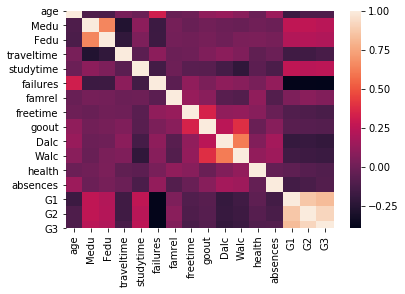

In [6]:
# heatmap visualises the correlation of each pair of values
sns.heatmap(df.corr())

"G3 has a strong correlation with attributes G2 and G1. 
This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. 
It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details)." (https://archive.ics.uci.edu/ml/datasets/Student+Performance)

Therefore we decide to eliminate G1 & G2

In [7]:
df = df.drop(columns=["G1", "G2"])

Additionally there can be seen that the attributes Medu-Fedu, Dalc-Walc, goout-Walc, goout-freetime correlate. Concerning the target variable G3, there is a slight negative correlation with the amount of failures. Other significant variables seem to be Medu, studytime, Fedu, Dalc, age, Walc (this order)

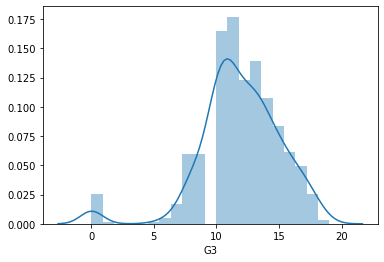

In [8]:
# Distribution of the target variable
np.median(df.G3)
sns.distplot(df.G3)

# Preprocessing

In [10]:
df['school'] = [0 if x == 'GP' else 1 if x == 'MS' else 2 for x in df['school']]

In [11]:
df['sex'] = [0 if x == 'F' else 1 if x == 'M' else 2 for x in df['sex']]

In [12]:
df['address'] = [0 if x == 'U' else 1 if x == 'R' else 2 for x in df['address']]

In [13]:
df['famsize'] = [0 if x == 'GT3' else 1 if x == 'LE3' else 2 for x in df['famsize']]

In [14]:
df['Pstatus'] = [0 if x == 'T' else 1 if x == 'A' else 2 for x in df['Pstatus']]

In [15]:
dummies = pd.get_dummies(df['Mjob'], prefix='Mjob')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Mjob',1)

In [16]:
dummies = pd.get_dummies(df['Fjob'], prefix='Fjob')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Fjob',1)

In [17]:
dummies = pd.get_dummies(df['reason'], prefix='reason')
df = pd.concat([df, dummies], axis=1)
df = df.drop('reason',1)

In [18]:
dummies = pd.get_dummies(df['guardian'], prefix='guardian')
df = pd.concat([df, dummies], axis=1)
df = df.drop('guardian',1)

In [19]:
df['schoolsup'] = [0 if x == 'no' else 1 if x == 'yes' else 2 for x in df['schoolsup']]

In [20]:
df['famsup'] = [0 if x == 'no' else 1 if x == 'yes' else 2 for x in df['famsup']]

In [21]:
df['paid'] = [0 if x == 'no' else 1 if x == 'yes' else 2 for x in df['paid']]

In [22]:
df['activities'] = [0 if x == 'no' else 1 if x == 'yes' else 2 for x in df['activities']]

In [23]:
df['nursery'] = [0 if x == 'no' else 1 if x == 'yes' else 2 for x in df['nursery']]

In [24]:
df['higher'] = [0 if x == 'no' else 1 if x == 'yes' else 2 for x in df['higher']]

In [25]:
df['internet'] = [0 if x == 'no' else 1 if x == 'yes' else 2 for x in df['internet']]

In [26]:
df['romantic'] = [0 if x == 'no' else 1 if x == 'yes' else 2 for x in df['romantic']]

In [29]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,0,1,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,11,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,0,0,0,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,11,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,15,0,1,0,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,15,0,0,0,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,0,0,0,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,0,2,3,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
645,1,0,18,0,1,0,3,1,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,16,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
646,1,0,18,0,0,0,1,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,9,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
647,1,1,17,0,1,0,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


# Classification